<a href="https://colab.research.google.com/github/ozzmanmuhammad/NLP-Experiments/blob/main/NLP_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

## Huggingface Pipeline

https://huggingface.co/docs/transformers/v4.16.2/en/main_classes/pipelines#pipelines

In [2]:
from transformers import pipeline

available tasks are

1. 'audio-classification' 
2. automatic-speech-recognition'
3. 'conversational'
4. 'feature-extraction'
5. 'fill-mask'
6. 'image-classification'
7. 'image-segmentation'
8. 'ner'
9. 'object-detection'
10. 'question-answering'
11. 'sentiment-analysis'
12. 'summarization'
13. 'table-question-answering'
14. 'text-classification'
15. 'text-generation'
16. 'text2text-generation'
17. 'token-classification'
19.  'translation'
20. 'zero-shot-classification'
21. 'translation_XX_to_YY']

The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering.

## Experiment #1 Text-Generation.

* Pipeline Parameter: `"text-generation": will return a TextGenerationPipeline:.`
* [TextGenerationPipeline link](https://huggingface.co/docs/transformers/v4.16.2/en/main_classes/pipelines#transformers.TextGenerationPipeline)

### GPT-Neo

For this task I wanted to use GPT-3 tranformer / attention based model that was trained on huge amount of data but it is not avaliable. So I'll be using GPT-Neo not best as GPT-3 but trained more data then GPT-2.

I wanted to use [GTP-Neo](https://huggingface.co/EleutherAI/gpt-neo-2.7B) model which was trained on 2.7Billion text datasets, but couldn't due to less RAM And the models size was 10Gb. So I had to use GPT-Neo-1.3B based model.

 [Other GTP-Neo](https://huggingface.co/EleutherAI) are avaliable here.

Offical github page for GPT-Neo :https://github.com/EleutherAI/gpt-neo

In [ ]:
# text_generator = pipeline("text-generation", model="EleutherAI/gpt-neo-2.7B")

In [ ]:
text_generator = pipeline("text-generation", model="EleutherAI/gpt-neo-1.3B")

Downloading:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/200 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

In [ ]:
prompt = "What is the meaning of life?"

In [ ]:
%%time
text = text_generator(prompt, max_length=100, do_sample=True, temperature = 0.9)

In [ ]:
print(text[0]['generated_text'])

What is the meaning of life? And is it to be considered as an activity?

Life's Meaning is not limited to Activities

Life is not an activity but the most important meaning of life is the meaning of life itself.

But we always thought like that, we used the word "determinism". But the definition of determinism is 'ability of being a deterministic system'. If a person cannot be a determinist by his mind itself,then this person cannot exist


What is the meaning of life? And is it to be considered as an activity?

Life's Meaning is not limited to Activities

Life is not an activity but the most important meaning of life is the meaning of life itself.

But we always thought like that, we used the word "determinism". But the definition of determinism is 'ability of being a deterministic system'. If a person cannot be a determinist by his mind itself,then this person cannot exist

In [ ]:
def textGenerator(prompt, max_length=50, do_sample=True):
  return text_generator(prompt, max_length=max_length, do_sample=do_sample, temperature = 0.9)[0]['generated_text']

In [ ]:
%%time
print(textGenerator("Right vs Wrong", max_length=500))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Right vs Wrong and the Law for the People’s Choice in the New US

The ‘New’ American is supposed to be a shining example of liberty. We are told that the ‘new’ United States is going to turn its back on the past and bring the people to heel. Of course, this comes as a huge surprise to many, not the least which is why there is a war on terrorism. We expect the politicians to give no ground if there is no fight on our part. However, there are many who still believe they can take advantage of the situation to expand their power. As long as we have the government on our side, those with control over our money, guns, resources, and minds will be able to take advantage of the law to their advantage.

This is why we must first understand the nature of our enemies. As I have mentioned this very subject already, many are attempting to take control of our government in order to undermine the freedom we enjoy in the first place. Some are simply out to gain power for themselves, and are using our 

In [ ]:
%%time
print(textGenerator("To love is to suffer", max_length=100))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


To love is to suffer. Love, I believe, is the root of suffering. It is the passion for the experience of being in love. Love is a feeling that is difficult to describe but is ultimately an experience of feeling it in a way that cannot be described. Love is like a fire; a consuming consuming, burning passion that burns down mountains, burns through walls and burns out the sky.

But the best thing in the world is to love.

There is a saying that
CPU times: user 44.9 s, sys: 164 ms, total: 45 s
Wall time: 44.7 s


In [ ]:
%%time
print(textGenerator("if x % 2 == 0", max_length=200))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


if x % 2 == 0:
                        z = x/2 + 1
                    else:
                        z = x/2 - 1
                else:
                    z = x
                j += 1

            sz = len(map(float, s))

        # Compute the distances
        dl1 = 0
CPU times: user 1min 30s, sys: 410 ms, total: 1min 31s
Wall time: 1min 30s


## Experiment #2 Text Extractive Summarization

In this experiment will summarize blog posts. For that will do web scraping using `BeautifullSoup` and the model will be `BERT` which is default in the `summarization pipeline`.

other models can be used which are [huggingface.co/models.](https://huggingface.co/models?filter=summarization).

In [ ]:
from transformers import pipeline
from bs4 import BeautifulSoup
import requests

### Loading the model

In [ ]:
#using default model 'BERT' (distilbart-cnn-12-6)
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

### Getting the Post

In [ ]:
URL = "https://towardsdatascience.com/understanding-gpt-3-in-5-minutes-7fe35c3a1e52#:~:text=GPT%2D3%20is%20a%20language,hasn't%20been%20trained%20on."

In [ ]:
request = requests.get(URL)

In [ ]:
request

<Response [200]>

In [ ]:
request.text

In [ ]:
#Scraping only texts from the URL page
soup = BeautifulSoup(request.text, "html.parser")
results = soup.find_all(['h1', 'p'])

In [ ]:
results[1], results[1].text

(<h1 class="pw-post-title hd he gu bf hf hg hh hi hj hk hl hm hn ho hp hq hr hs ht hu hv hw hx hy hz ia ib" id="818b">Understanding GPT-3 In 5 Minutes</h1>,
 'Understanding GPT-3 In 5 Minutes')

In [ ]:
text = [result.text for result in results]
text

['Sign in',
 'Understanding GPT-3 In 5 Minutes',
 'Alberto Romero',
 'Jun 21, 2021·5 min read',
 'A month ago I published this 35-minute-long overview of GPT-3. But I value your time as a reader, so I decided to write a super-condensed 5-minute article. I’ve summarized the main ideas from the longer article: What GPT-3 is, what it can do, and its present and future impact on the world. Enjoy!',
 'What GPT-3 is',
 'GPT-3 is the third version of OpenAI’s family of Generative Pre-Trained models. GPT-1 and GPT-2 laid the foundations for GPT-3, proving the success of two key hypotheses: Transformers+unsupervised pre-training works fine (GPT-1) and language models can multitask (GPT-2).',
 'GPT-3 is a language model based in the transformer architecture, pre-trained in a generative, unsupervised manner that shows decent performance in zero/one/few-shot multitask settings. It works by predicting the next token given a sequence of tokens and can do so for NLP tasks it hasn’t been trained on. A

In [ ]:
article = "".join(text)

In [ ]:
article

"Sign inUnderstanding GPT-3 In 5 MinutesAlberto RomeroJun 21, 2021·5 min readA month ago I published this 35-minute-long overview of GPT-3. But I value your time as a reader, so I decided to write a super-condensed 5-minute article. I’ve summarized the main ideas from the longer article: What GPT-3 is, what it can do, and its present and future impact on the world. Enjoy!What GPT-3 isGPT-3 is the third version of OpenAI’s family of Generative Pre-Trained models. GPT-1 and GPT-2 laid the foundations for GPT-3, proving the success of two key hypotheses: Transformers+unsupervised pre-training works fine (GPT-1) and language models can multitask (GPT-2).GPT-3 is a language model based in the transformer architecture, pre-trained in a generative, unsupervised manner that shows decent performance in zero/one/few-shot multitask settings. It works by predicting the next token given a sequence of tokens and can do so for NLP tasks it hasn’t been trained on. After seeing just a few examples, it 

### Converting it into chucks

to avoid over usage of RAM

In [ ]:
article = article.replace('.', '.<eos>')
article = article.replace('?', '?<eos>')
article = article.replace('!', '!<eos>')
sentences = article.split('<eos>')

In [ ]:
sentences

['Sign inUnderstanding GPT-3 In 5 MinutesAlberto RomeroJun 21, 2021·5 min readA month ago I published this 35-minute-long overview of GPT-3.',
 ' But I value your time as a reader, so I decided to write a super-condensed 5-minute article.',
 ' I’ve summarized the main ideas from the longer article: What GPT-3 is, what it can do, and its present and future impact on the world.',
 ' Enjoy!',
 'What GPT-3 isGPT-3 is the third version of OpenAI’s family of Generative Pre-Trained models.',
 ' GPT-1 and GPT-2 laid the foundations for GPT-3, proving the success of two key hypotheses: Transformers+unsupervised pre-training works fine (GPT-1) and language models can multitask (GPT-2).',
 'GPT-3 is a language model based in the transformer architecture, pre-trained in a generative, unsupervised manner that shows decent performance in zero/one/few-shot multitask settings.',
 ' It works by predicting the next token given a sequence of tokens and can do so for NLP tasks it hasn’t been trained on.',

In [ ]:
def chucking_articles(sentences, max_chunk = 500):
    # max_chunk = 500
    current_chunk = 0 
    chunks = []
    for sentence in sentences:
        if len(chunks) == current_chunk + 1: 
            if len(chunks[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
                chunks[current_chunk].extend(sentence.split(' '))
            else:
                current_chunk += 1
                chunks.append(sentence.split(' '))
        else:
            print(current_chunk)
            chunks.append(sentence.split(' '))

    for chunk_id in range(len(chunks)):
        chunks[chunk_id] = ' '.join(chunks[chunk_id])
    return chunks

In [ ]:
chunks = chucking_articles(sentences, max_chunk = 500)

In [ ]:
len(chunks[0].split(" ")) # less then 500

492

In [ ]:
len(chunks)

2

### Summarizing the chunks

In [ ]:
summary = summarizer(chunks, max_length=50, min_length=10, do_sample=False)

In [ ]:
summary

[{'summary_text': ' GPT-3 is the third version of OpenAI’s family of Generative Pre-Trained models . It is a language model based in the transformer architecture, pre-trained in a generative, unsupervised manner'},
 {'summary_text': ' GPT-3 is an amazing AI but, like any other powerful technology, can be used maliciously . Some ascribed human characteristics to the system, others built products and companies on top of it . Here are some examples of the'}]

In [ ]:
summary = "".join(sen['summary_text'] for sen in summary )
summary

' GPT-3 is the third version of OpenAI’s family of Generative Pre-Trained models . It is a language model based in the transformer architecture, pre-trained in a generative, unsupervised manner GPT-3 is an amazing AI but, like any other powerful technology, can be used maliciously . Some ascribed human characteristics to the system, others built products and companies on top of it . Here are some examples of the'

### Creating ftn for using it on more examples

In [ ]:
def scrape_and_summarize(URL, tags=['h1','p'], max_length=120, min_length=30 ):
  
  soup = BeautifulSoup(requests.get(URL).text, "html.parser")
  results = [result.text for result in soup.find_all(tags)]
  article = "".join(results)

  original_length = len(article.split(" "))

  article = article.replace('.', '.<eos>').replace('?', '?<eos>').replace('!', '!<eos>')
  sentences = article.split('<eos>')

  chunks = chucking_articles(sentences, max_chunk = 500)

  summary = summarizer(chunks, max_length=max_length, min_length=min_length, do_sample=False)

  summary = "".join(sen['summary_text'] for sen in summary )

  print(f"Original Article Length: {original_length}\n Summary length: {len(summary.split(' '))}")
  print(f"Summary: \n{summary}")


In [ ]:
scrape_and_summarize(URL)

0
Original Article Length: 649
 Summary length: 69
Summary: 
 GPT-3 is the third version of OpenAI’s family of Generative Pre-Trained models . It is a language model based in the transformer architecture, pre-trained in a generative, unsupervised manner GPT-3 is an amazing AI but, like any other powerful technology, can be used maliciously . Some ascribed human characteristics to the system, others built products and companies on top of it . Here are some examples of the


In [ ]:
URL_2 = "https://colah.github.io/posts/2015-08-Understanding-LSTMs/"
scrape_and_summarize(URL_2, tags=["h1", "p"])

0
Original Article Length: 2180
 Summary length: 330
Summary: 
 Recurrent neural networks are networks with loops in them, allowing information to persist . These loops make them seem kind of mysterious, but they aren’t all that different than a normal neural network . LSTMs are a very special kind of recurrent neural network which works, for many tasks, much much better than the standard version . Long Short Term Memory networks are a special kind of RNN, capable of learning long-term dependencies . They work tremendously well on a large variety of problems, and are now widely used . The key to LSTMs is the cell state, the horizontal line running through the top of the diagram . The cell state is kind of like a conveyor belt, with only some minor linear interactions . LSTM has three gates, to protect and control the cell state . They are composed out of a sigmoid neural net layer and a pointwise multiplication operation . The first step is to decide what information we’re going to thr

Recurrent neural networks are networks with loops in them, allowing information to persist . These loops make them seem kind of mysterious, but they aren’t all that different than a normal neural network . LSTMs are a very special kind of recurrent neural network which works, for many tasks, much much better than the standard version . Long Short Term Memory networks are a special kind of RNN, capable of learning long-term dependencies . They work tremendously well on a large variety of problems, and are now widely used . The key to LSTMs is the cell state, the horizontal line running through the top of the diagram . The cell state is kind of like a conveyor belt, with only some minor linear interactions . LSTM has three gates, to protect and control the cell state . They are composed out of a sigmoid neural net layer and a pointwise multiplication operation . The first step is to decide what information we’re going to throw away from the state . In the example of our language model, we want to add the gender of the new subject to the state, so that the correct pronouns can be used . The previous steps already decided what to do, we need to actually do it . Not all LSTMs are the same as the above; almost every paper uses a slightly different version . The Gated Recurrent Unit, or GRU, combines the forget and input gates into a single “update gate” The resulting model is simpler than standard LSTM models and growing increasingly popular . A common opinion among researchers is: “Yes!  There is a next step and it’s attention! ” The idea is to let every step of an RNN pick information to look at from some larger collection of information . Grid LSTMs by Kalchbrenner, et al.  (2015) seem extremely promising . The last few years have been an exciting time for recurrent neural networks .

###  Abstractive Summarization with Pegasus Soon!

## Experiment #3 Text Classification aka Sentiment Analysis

For sentiment analysis, I'll be using [roBERTa](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment) based sentiment analysis. This roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English. 

In [3]:
!pip install tweepy

In [4]:
API_KEY = ""
API_KEY_SECRET = ""

ACCESS_TOKEN = ""
ACCESS_TOKEN_SECRET = ""

In [5]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [6]:
import tweepy as tw

# Authenticate
auth = tw.OAuthHandler(API_KEY, API_KEY_SECRET)
# Set Tokens
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)


In [7]:
print(api.verify_credentials().screen_name)

OzzmanMuhammad


### Getting tweets

In [8]:
hashtag = "#AuratMarch2022"

In [9]:
queryy = tw.Cursor(api.search, q=hashtag, lang="en").items(5000)

### Preprocessing

In [10]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [11]:
tweets = [{'Tweet':preprocess(tweet.text), 'Timestamp':tweet.created_at} for tweet in queryy]

In [14]:
print(tweets[2]['Tweet'])

RT @user Our Moulanas regard Saudis as moral &amp; spiritual compass. Saudi monarch MBS says women and men only need to dress decently…


In [15]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,RT @user #بیہودہ_مارچ_بند_کرو ...,2022-02-22 05:07:56
1,RT @user Poster -- Reimagining Gender\n\nFemin...,2022-02-22 04:56:13
2,RT @user Our Moulanas regard Saudis as moral &...,2022-02-22 04:55:23
3,Asked hubby what poster will he carry for #Aur...,2022-02-22 04:52:20
4,RT @user For those who want to know whether th...,2022-02-22 04:51:30


In [17]:
df.to_csv('tweets5000.csv')

### Sentiment Analysis with roBERTa model

This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark

link: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment


In [16]:
sentiment_analyzer = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment")

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Labels: 

  0 -> Negative

  1 -> Neutral 
  
  2 -> Positive

In [24]:
tweets_df = df.copy()

In [53]:
tweets_df['Sentiments'] = tweets_df['Tweet'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
tweets_df['scores'] = tweets_df['Tweet'].apply(lambda x: sentiment_analyzer(x)[0]['score'])

In [55]:
tweets_df.head(10)

,Tweet,Timestamp,Sentiments,scores
0,RT @user #بیہودہ_مارچ_بند_کرو ...,2022-02-22 05:07:56,LABEL_1,0.617635
1,RT @user Poster -- Reimagining Gender\n\nFemin...,2022-02-22 04:56:13,LABEL_0,0.630567
2,RT @user Our Moulanas regard Saudis as moral &...,2022-02-22 04:55:23,LABEL_1,0.796430
3,Asked hubby what poster will he carry for #Aur...,2022-02-22 04:52:20,LABEL_1,0.853515
4,RT @user For those who want to know whether th...,2022-02-22 04:51:30,LABEL_1,0.833865
5,RT @user #AuratMarch2022 #سلیکٹڈبداخلاق_وزیراع...,2022-02-22 04:48:19,LABEL_1,0.777632
6,RT @user Our Moulanas regard Saudis as moral &...,2022-02-22 04:48:12,LABEL_1,0.796430
7,RT @user Poster -- Reimagining Gender\n\nFemin...,2022-02-22 04:48:08,LABEL_0,0.630567
8,"RT @user Women is human not an object, sexual ...",2022-02-22 04:48:02,LABEL_1,0.578625
9,RT @user If the #AuratMarch2022 is in this way...,2022-02-22 04:47:55,LABEL_1,0.630817


In [54]:
tweets_df.iloc[3].Tweet

'Asked hubby what poster will he carry for #AuratMarch2022 &amp; he said : "Mubarik ho,beti hoi hai!"'

In [66]:
def labels(x):
  if x == "LABEL_0":
    return "Negative"
  elif x == "LABEL_1":
    return "Neutral"
  else:
    return "Positive"

In [67]:
tweets_df["Analysis"] = tweets_df["Sentiments"].apply(lambda x : labels(x))

In [89]:
tweets_df.head(10)

,Tweet,Timestamp,Sentiments,scores,Analysis
0,RT @user #بیہودہ_مارچ_بند_کرو ...,2022-02-22 05:07:56,LABEL_1,0.617635,Neutral
1,RT @user Poster -- Reimagining Gender\n\nFemin...,2022-02-22 04:56:13,LABEL_0,0.630567,Negative
2,RT @user Our Moulanas regard Saudis as moral &...,2022-02-22 04:55:23,LABEL_1,0.796430,Neutral
3,Asked hubby what poster will he carry for #Aur...,2022-02-22 04:52:20,LABEL_1,0.853515,Neutral
4,RT @user For those who want to know whether th...,2022-02-22 04:51:30,LABEL_1,0.833865,Neutral
5,RT @user #AuratMarch2022 #سلیکٹڈبداخلاق_وزیراع...,2022-02-22 04:48:19,LABEL_1,0.777632,Neutral
6,RT @user Our Moulanas regard Saudis as moral &...,2022-02-22 04:48:12,LABEL_1,0.796430,Neutral
7,RT @user Poster -- Reimagining Gender\n\nFemin...,2022-02-22 04:48:08,LABEL_0,0.630567,Negative
8,"RT @user Women is human not an object, sexual ...",2022-02-22 04:48:02,LABEL_1,0.578625,Neutral
9,RT @user If the #AuratMarch2022 is in this way...,2022-02-22 04:47:55,LABEL_1,0.630817,Neutral


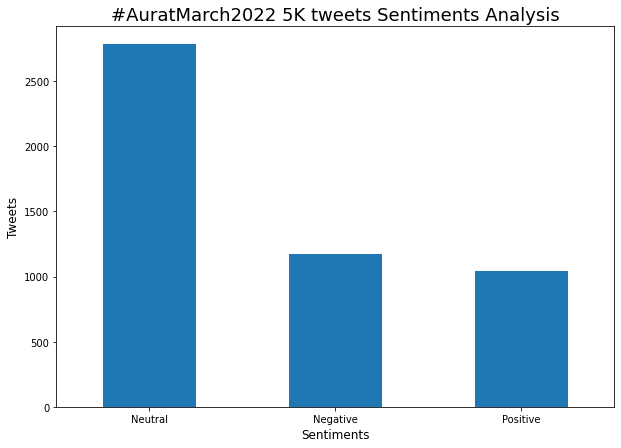

In [82]:

plt.figure(figsize = (10, 7))
ax = tweets_df.Analysis.value_counts().plot.bar(rot=0)
plt.xlabel("Sentiments", fontsize=12)
plt.ylabel("Tweets", fontsize=12)
plt.title("#AuratMarch2022 5K tweets Sentiments Analysis" , fontsize=18);


#### Analysis

This sentiment analysis is not doing right because

1. Some tweets are not in english so it is classifing them into neutral label.
2. It is checking sentiments based on words not the actual context of the tweets content

In [85]:
neutral = tweets_df[tweets_df['Analysis']=="Neutral"][['Tweet']]

In [88]:
neutral.head(10)

,Tweet
0,RT @user #بیہودہ_مارچ_بند_کرو ...
2,RT @user Our Moulanas regard Saudis as moral &...
3,Asked hubby what poster will he carry for #Aur...
4,RT @user For those who want to know whether th...
5,RT @user #AuratMarch2022 #سلیکٹڈبداخلاق_وزیراع...
6,RT @user Our Moulanas regard Saudis as moral &...
8,"RT @user Women is human not an object, sexual ..."
9,RT @user If the #AuratMarch2022 is in this way...
10,RT @user Say no to #AuratMarch2022 hijab is ou...
13,RT @user If the #AuratMarch2022 is in this way...


In [90]:
positive = tweets_df[tweets_df['Analysis']=="Positive"][['Tweet']]
positive.head(10)

,Tweet
11,RT @user The brave @user \nIn solidarity with ...
12,RT @user This sister is the best example for w...
22,RT @user Comfy and stylish outfits \nComing so...
25,Comfy and stylish outfits \nComing soon\nSumme...
34,To understand watch this \nLike and subscribe ...
35,RT @user 📢🔔\nAurat March Lahore is proud to an...
36,RT @user THIS is how simple it should be for E...
39,RT @user Altaf bhai is the biggest Feminist in...
41,Aurat March is about to feel safe being walkin...
42,Aurat March is about to feel safe being walkin...


In [91]:
negative = tweets_df[tweets_df['Analysis']=="Negative"][['Tweet']]
negative.head(10)

,Tweet
1,RT @user Poster -- Reimagining Gender\n\nFemin...
7,RT @user Poster -- Reimagining Gender\n\nFemin...
14,RT @user Three brothers divorce wives at the s...
17,RT @user #صحافت_کرودہشتگردی_نہیں\n\nDuring the...
18,#AuratMarch2022 is the name this year you fool...
21,What for #AuratMarch2022 ? \n#Telenor @user w...
23,RT @user I keep thinking about how so many wom...
24,RT @user I keep thinking about how so many wom...
30,RT @user In Pakistan girls are still strugglin...
48,"RT @user In the name of women's march, men are..."


### Sentiment Analysis using NaiveBayesAnalyzer

In [106]:
# Import stopwords
import nltk
from nltk.corpus import stopwords
# Import textblob
from textblob import Word, TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Preprocessing

In [107]:

stop_words = stopwords.words('english')
custom_stopwords = ['RT', hashtag]

def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

In [111]:
tweets_df_2 = df.copy()
tweets_df_2['Processed Tweet'] = tweets_df_2['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
tweets_df_2.head()

,Tweet,Timestamp,Processed Tweet
0,RT @user #بیہودہ_مارچ_بند_کرو ...,2022-02-22 05:07:56,@user #بیہودہ_مارچ_بند_کرو For protesting http
1,RT @user Poster -- Reimagining Gender\n\nFemin...,2022-02-22 04:56:13,@user Poster -- Reimagining Gender Feminist rh...
2,RT @user Our Moulanas regard Saudis as moral &...,2022-02-22 04:55:23,@user Our Moulanas regard Saudis moral &amp; s...
3,Asked hubby what poster will he carry for #Aur...,2022-02-22 04:52:20,"Asked hubby poster carry &amp; said : ""Mubarik..."
4,RT @user For those who want to know whether th...,2022-02-22 04:51:30,@user For want know whether participation Aura...


In [96]:
print('Base review\n', df['Tweet'][1])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', tweets_df_2['Processed Tweet'][1])

Base review
 RT @user Poster -- Reimagining Gender

Feminist rhetoric often accidentally reproduces gender essentialism when discussing gender ro…

------------------------------------

Cleaned and lemmatized review
 @user Poster -- Reimagining Gender Feminist rhetoric often accidentally reproduces gender essentialism discussing gender ro…


#### Sentiments Calculation

First is tried it using `TextBlob(x, analyzer=NaiveBayesAnalyzer()).sentiment[0]`but problem was that, every time I was passing a tweet it was training itself and that was taking so much time. so I build it myself using nltk and textblob and was trained on nltk.corpus.movie_reviews.

In [133]:
from __future__ import absolute_import
from collections import namedtuple

import nltk

from textblob.en import sentiment as pattern_sentiment
from textblob.tokenizers import word_tokenize
from textblob.decorators import requires_nltk_corpus
from textblob.base import BaseSentimentAnalyzer, DISCRETE

In [134]:
def _default_feature_extractor(words):
    """Default feature extractor for the NaiveBayesAnalyzer."""
    return dict(((word, True) for word in words))


In [135]:
kind = DISCRETE
    #: Return type declaration
RETURN_TYPE = namedtuple('Sentiment', ['classification', 'p_pos', 'p_neg'])

_classifier = None
feature_extractor = _default_feature_extractor

neg_ids = nltk.corpus.movie_reviews.fileids('neg')
pos_ids = nltk.corpus.movie_reviews.fileids('pos')

neg_feats = [(feature_extractor(
    nltk.corpus.movie_reviews.words(fileids=[f])), 'neg') for f in neg_ids]

pos_feats = [(feature_extractor(
    nltk.corpus.movie_reviews.words(fileids=[f])), 'pos') for f in pos_ids]

train_data = neg_feats + pos_feats

_classifier = nltk.classify.NaiveBayesClassifier.train(train_data)

In [158]:
len(train_data)

2000

In [138]:
def analyze(text):
    """Return the sentiment as a named tuple of the form:
    ``Sentiment(classification, p_pos, p_neg)``
    """

    tokens = word_tokenize(text, include_punc=False)
    filtered = (t.lower() for t in tokens if len(t) >= 3)
    feats = feature_extractor(filtered)
    prob_dist = _classifier.prob_classify(feats)

    return RETURN_TYPE(
        classification=prob_dist.max(),
        p_pos=prob_dist.prob('pos'),
        p_neg=prob_dist.prob("neg")
    )

In [146]:
tweets_df_2["Processed Tweet"][1]

'@user Poster -- Reimagining Gender Feminist rhetoric often accidentally reproduces gender essentialism discussing gender ro…'

In [150]:
analyze(tweets_df_2["Processed Tweet"][1]).classification

'neg'

In [151]:
  # Calculate sentiments
tweets_df_2['Sentiments'] = tweets_df_2["Processed Tweet"].apply(
    lambda x: analyze(x).classification
    )

In [152]:
tweets_df_2.head()

,Tweet,Timestamp,Processed Tweet,Sentiments
0,RT @user #بیہودہ_مارچ_بند_کرو ...,2022-02-22 05:07:56,@user #بیہودہ_مارچ_بند_کرو For protesting http,pos
1,RT @user Poster -- Reimagining Gender\n\nFemin...,2022-02-22 04:56:13,@user Poster -- Reimagining Gender Feminist rh...,neg
2,RT @user Our Moulanas regard Saudis as moral &...,2022-02-22 04:55:23,@user Our Moulanas regard Saudis moral &amp; s...,pos
3,Asked hubby what poster will he carry for #Aur...,2022-02-22 04:52:20,"Asked hubby poster carry &amp; said : ""Mubarik...",pos
4,RT @user For those who want to know whether th...,2022-02-22 04:51:30,@user For want know whether participation Aura...,pos


In [155]:
tweets_df_2.Sentiments.value_counts()

pos    4606
neg     394
Name: Sentiments, dtype: int64

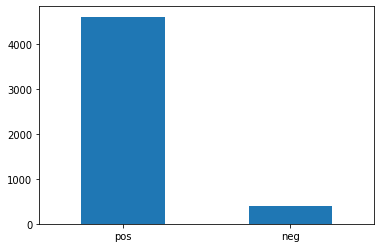

In [157]:
tweets_df_2.Sentiments.value_counts().plot.bar(rot = 0)

In [153]:
tweets_df.to_csv("tweets_roBERTa.csv")
tweets_df_2.to_csv("tweets_NaiveBayes.csv")

In [154]:
from google.colab import files
files.download('tweets_roBERTa.csv') 
files.download('tweets_NaiveBayes.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>